## Support Vector Machines Assignment-1

In [1]:
# Q1. What is the mathematical formula for a linear SVM?

# Ans:

# A Linear Support Vector Machine (SVM) is a supervised learning algorithm that finds the optimal hyperplane 
# to separate two classes in a dataset. The mathematical formula for a linear SVM is based on finding a 
# decision boundary of the form:
# f(x) = w^T * x + b
# where, x is the input feature vector, w is the weight vector and b is the bias

# The goal of SVM is to maximize the margin between two classes while minimizing classification errors.
# Considering the soft margin, we need to minimize the following cost function:
# Minimize: 1/2 ||w||^2 + C * Σ(ξ_i) 
# where, c is the number of points we can consider for miscalculation and ξ_i is the sumation of
# the distance of incorrect data points from marginal plane

In [2]:
# Q2. What is the objective function of a linear SVM?

# Ans:

# The objective function of a linear SVM aims to find the optimal hyperplane that maximizes the margin
# between two classes while minimizing the classification error. It can be expressed as:   

# Objective Function: Minimize: 1/2 ||w||^2 + C * Σ(ξ_i) 


In [3]:
# Q3. What is the kernel trick in SVM?

# Ans:

# The kernel trick is a clever technique used in Support Vector Machines (SVMs) to handle non-linearly 
# separable data.

# It helps us to transform our data by making new features or by transforming data into different dimension.
# So that we can perform our prediction.

In [4]:
# Q4. What is the role of support vectors in SVM Explain with example

# Ans:

# Support vectors are crucial in Support Vector Machines (SVMs) and play a key role in defining the decision boundary.
# In an SVM, support vectors are the data points that are closest to the decision boundary 
# (the hyperplane that separates the classes).
# They are the most influential data points in determining the position and orientation of the decision boundary.

# Role of Support Vectors:
# Defining the Margin: The margin is the region around the decision boundary that is free of any data points. 
# Support vectors directly determine the width of this margin. The SVM aims to maximize this margin, as a 
# wider margin generally leads to better generalization performance on unseen data.
# Determining the Decision Boundary: The decision boundary is entirely determined by the support vectors. 
# If you were to remove all other data points and keep only the support vectors, the decision boundary 
# would remain the same.

# Example:
# Imagine we have a 2D dataset with two classes (e.g., cats and dogs) that we want to classify using an SVM.

# Finding the Hyperplane: The SVM algorithm finds the optimal line (hyperplane in higher dimensions) that 
# best separates the cats and dogs.
# Identifying Support Vectors: The support vectors are the individual cats and dogs closest to the dividing line.
# Margin: The margin is the area around the line, bordered by the support vectors of each class.
# Decision Boundary: The line itself is the decision boundary. Any new animal that falls on one side of 
# the line will be classified as a cat, and any animal on the other side will be classified as a dog.

In [5]:
# Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

# Ans:

# Hyperplane:
# Definition: The hyperplane is the decision boundary that separates the data points of different classes. 
# In a 2D space, it's a line; in 3D, it's a plane; and in higher dimensions, it's a hyperplane.

# Marginal Planes and Margin:
# Definition: The marginal planes are parallel to the hyperplane and pass through the support vectors 
# (the data points closest to the hyperplane). The region between the marginal planes is the margin.

# Hard Margin SVM:
# Definition: A hard margin SVM is used when the data is perfectly linearly separable. It aims to find the 
# hyperplane that maximizes the margin with no misclassifications.

# Soft Margin SVM:
# Definition: A soft margin SVM is used when the data is not perfectly linearly separable (or when we want 
# to be more robust to outliers). It allows for some misclassifications or data points falling within the margin.

In [6]:
# Q6. SVM Implementation through Iris dataset.

# Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.
# Train a linear SVM classifier on the training set and predict the labels for the testing set.
# Compute the accuracy of the model on the testing set.
# Plot the decision boundaries of the trained model using two of the features.
# Try different values of the regularisation parameter C and see how it affects the performance of the model.

Model Accuracy: 0.90


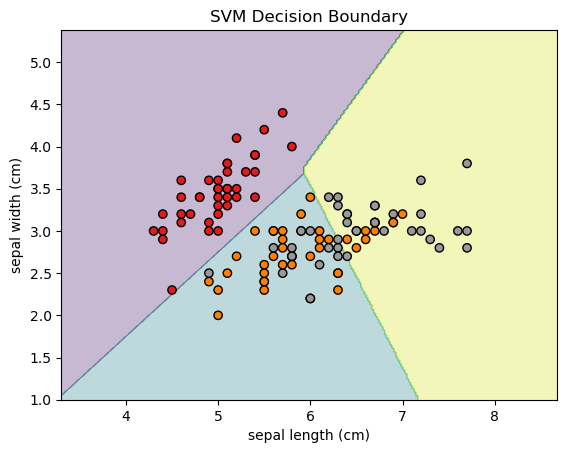

C = 0.01, Accuracy: 0.30
C = 0.1, Accuracy: 0.83
C = 1, Accuracy: 0.90
C = 10, Accuracy: 0.90
C = 100, Accuracy: 0.90


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using first two features for visualization
y = iris.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Linear SVM classifier
svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = svm_clf.predict(X_test)

# Step 5: Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Step 6: Plot decision boundaries
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Set1)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(svm_clf, X_train, y_train)

# Step 7: Experiment with different C values
C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    svm_clf = SVC(kernel="linear", C=C)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"C = {C}, Accuracy: {acc:.2f}")
